# Recurrent Neural Network

In [1]:
!git clone https://github.com/tatwan/generative_ai_class.git

Cloning into 'generative_ai_class'...
remote: Enumerating objects: 10156, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 10156 (delta 40), reused 126 (delta 37), pack-reused 10021
Receiving objects: 100% (10156/10156), 246.43 MiB | 22.54 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (10057/10057), done.


## Part 1 - Data Preprocessing

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [5]:
dataset_train = pd.read_csv('/content/generative_ai_class/Activities/Class Activity/demo_RNN/Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


<Axes: >

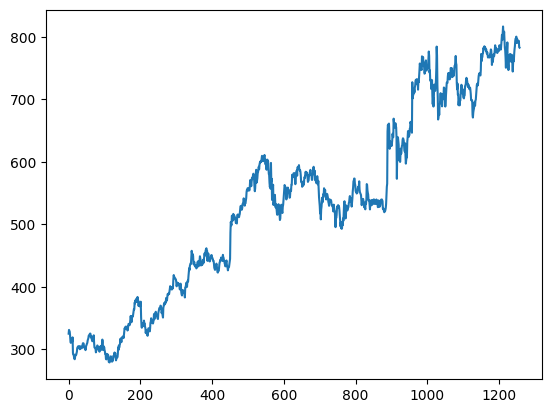

In [7]:
dataset_train['Open'].plot()

In [6]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [15]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set[i-60:i, 0])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[325.25, 331.27, 329.83, ..., 321.3 , 322.31, 324.8 ],
       [331.27, 329.83, 328.34, ..., 322.31, 324.8 , 325.5 ],
       [329.83, 328.34, 322.04, ..., 324.8 , 325.5 , 324.66],
       ...,
       [774.25, 776.03, 779.31, ..., 792.36, 790.9 , 790.68],
       [776.03, 779.31, 779.  , ..., 790.9 , 790.68, 793.7 ],
       [779.31, 779.  , 779.66, ..., 790.68, 793.7 , 783.33]])

In [16]:
y_train

array([325.5 , 324.66, 319.19, ..., 793.7 , 783.33, 782.75])

### Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [19]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

### Reshaping

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [22]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [27]:
regressor.add(Dense(units = 1))

In [28]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

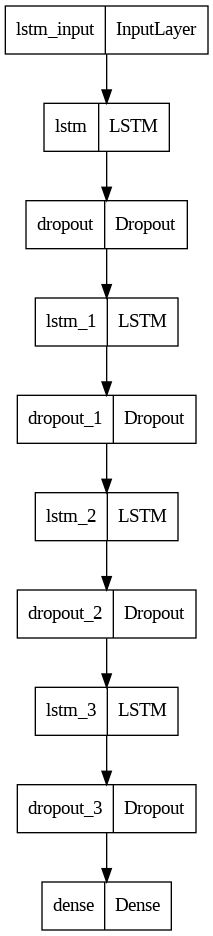

In [29]:
from keras.utils import plot_model

plot_model(regressor)

### Compiling the RNN

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [31]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 18s 234ms/step - loss: 0.0418
Epoch 2/100
38/38 [==============================] - 10s 276ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0058
Epoch 8/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0044
Epoch 13/10

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [32]:
dataset_test = pd.read_csv('/content/generative_ai_class/Activities/Class Activity/demo_RNN/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

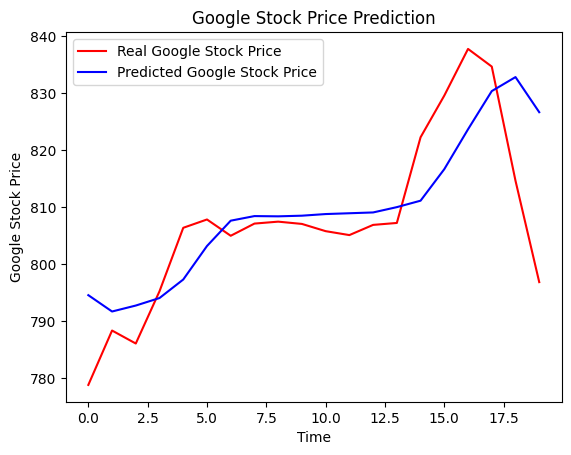

In [34]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()